In [39]:
import mglearn
import graphviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.linear_model import LinearRegression


#### 결정 트리

- 분류와 회귀 문제에 널리 사용하는 모델

- 결정에 다다르기 위해 예/아니오 질문을 이어 나가면서 학습한다.
- 스무고개 놀이의 질문과 비슷하며 예시는 아래와 같다.

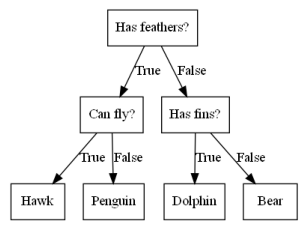

In [7]:
mglearn.plots.plot_animal_tree()

- 루트 노드라 불리는 맨 위 노드에서부터 시작해서 계층적으로 영역을 분할하는 알고리즘

- 영역을 계속해서 분할했을 때 분할된 영역이 한 개의 타깃값만 가지면 더 이상 분할할 수 없고 이 노드를 순수 노드라고 한다.
- 회귀 문제에도 트리를 사용할 수 있는데 각 노드의 테스트 결과에 따라 트리를 탐색해가고 새로운 데이터 포인트에 해당되는 리프 노드를 찾는다.
- 찾은 리프 노드의 훈련 데이터 평균값이 데이터 포인트의 출력이 된다.

- 트리의 모든 리프 노드가 순수 노드가 될 때까지 진행하면 모델이 매우 복잡해지고 과적합이 발생한다.

- 훈련 세트에 100% 맞춰져 있어 이상치 하나에 너무 민감하게 반응할 수 있기 때문이다.
- 이를 방지하기 위해선 사전 가치지기(트리 생성을 일찍 중단), 사후 가지치기(트리 생성 후 데이터 포인트가 적은 노드를 삭제 또는 병합) 크게 2가지가 있다.
- scikir-learn에서 결정트리는 Regressor와 Classifier에 구현되어있으며 사전 가지치기만 지원한다.

In [10]:
## 사전 가지치기 예시

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
print(f'훈련 세트 정확도 : {tree.score(X_train, y_train):.3f}')
print(f'테스트 세트 정확도 : {tree.score(X_test, y_test):.3f}')

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.923


In [11]:
## 과적합 방지를 위해 깊이를 4로(연속된 질문을 최대 4개로) 제한

tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)
print(f'훈련 세트 정확도 : {tree.score(X_train, y_train):.3f}')
print(f'테스트 세트 정확도 : {tree.score(X_test, y_test):.3f}')

훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.944


In [13]:
## 결정트리 저장
export_graphviz(tree, out_file='tree.dot', class_names=['악성', '양성'],
                feature_names=cancer.feature_names, impurity=False, filled=True)

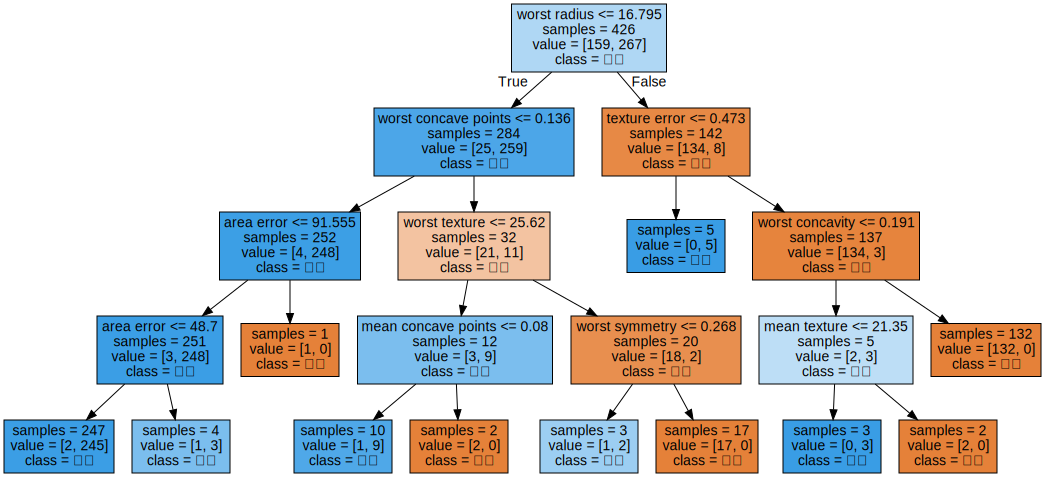

In [23]:
## 결정트리 저장파일 불러오기
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### 트리의 특성 중요도

- 전체 트리를 살펴보는 것은 어려울 수 있어 어떻게 작동하는지 요약하는 속성들을 사용 가능

- 가장 널리 사용되는 것은 트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 특성 중요도
- 0과 1사이의 숫자로 전체 합은 1

In [25]:
print(f'트리의 특성 중요도 : \n {tree.feature_importances_}')

트리의 특성 중요도 : 
 [0.         0.01258462 0.         0.         0.         0.
 0.         0.0141577  0.         0.         0.         0.04839825
 0.         0.01261296 0.         0.         0.         0.
 0.         0.         0.72682851 0.03323127 0.         0.
 0.         0.         0.018188   0.1221132  0.01188548 0.        ]


c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


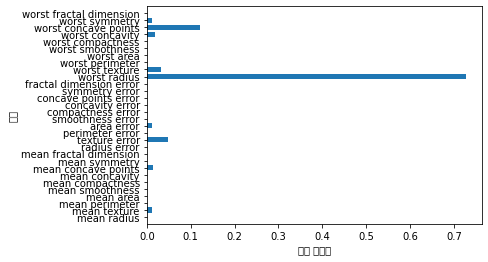

In [29]:
## 특성 중요도 시각화

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('특성 중요도')
    plt.ylabel('특성')
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

- feature_importances_ 값이 낮다고 특성이 유용하지 않다는 뜻은 아니다.

- 트리가 그 특성을 선택하지 않았을 ㅂ뿐이며 다른 특성이 동일한 정보를 지니고 있어서일 가능성도 있다.
- 선형 모델과 달리 특성 중요도는 항상 양수이며 어떤 클래스를 지지하는지 알 수 없다.
- 특성과 클래스 사이에 간단하지 않은 관계가 있을 수 있으며 예시는 아래와 같다.

Feature importances: [0. 1.]


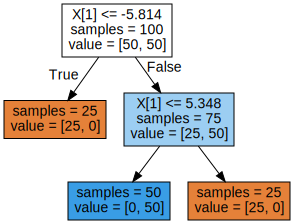

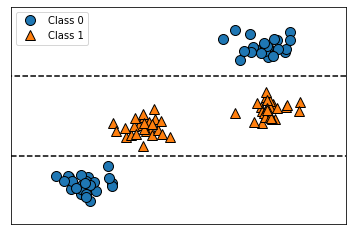

In [30]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

#### 회귀 결정 트리

Text(0, 0.5, '가격 ($/Mbyte)')

c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


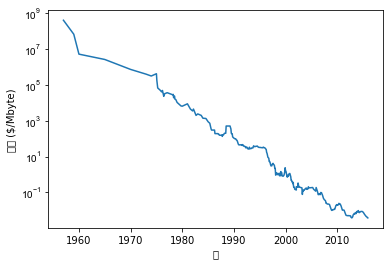

In [34]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'ram_price.csv'))

plt.yticks(fontname='Arial')
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('년')
plt.ylabel('가격 ($/Mbyte)')

In [40]:
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만든다.
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만 사용
X_train = data_train.date[:, np.newaxis]
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꾼다.
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌린다.
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)


C:\Users\dbswo\AppData\Local\Temp\ipykernel_19784\817059698.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[:, np.newaxis]
C:\Users\dbswo\AppData\Local\Temp\ipykernel_19784\817059698.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = ram_prices.date[:, np.newaxis]


c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54984 (\N{HANGUL SYLLABLE HUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47144 (\N{HANGUL SYLLABLE RYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\minico

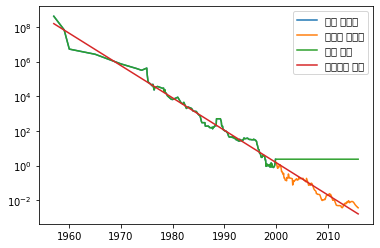

In [42]:
plt.semilogy(data_train.date, data_train.price, label='훈련 데이터')
plt.semilogy(data_test.date, data_test.price, label='테스트 데이터')
plt.semilogy(ram_prices.date, price_tree, label='트리 예측')
plt.semilogy(ram_prices.date, price_lr, label='선형회귀 예측')
plt.legend()

- 위의 그래프에서 트리 모델은 복잡도에 제한을 두지 않아 전체 데이터 셋을 완벽하게 기억하여 훈련 데이터를 완벽하게 예측한다.

- 그러나 모델이 가진 데이터 범위 밖으로 나갈 경우 마지막 포인트를 이용해 예측하기 때문에 훈련 데이터 밖의 새로운 데이터를 예측할 능력이 없다는 사실을 보여준다. (시계열 데이터에 한함)

#### 장단점과 매개변수

- 보통 사전 가지치기 방법 중 max_depth, max_leaf_nodes, min_samples_leaf 중 하나만 지정해도 과대적합을 막는데 충분하다.

- 앞서 소개한 다른 알고리즘보다 나은 점이 두 가지 있다.
- 첫 번째는 모델을 쉽게 시각화할 수 있어 비전문가도 이해하기 쉽다.
- 두 번째는 데이터의 스케일에 구애받지 않는다. 각 특성이 개별적으로 처리되어 데이터를 분할하기 때문에 특성의 정규화나 표준화 같은 전처리 과정이 필요없다.
- 단점은 사전 가지치기를 해도 과대적합되는 경향이 있어 일반화 성능이 떨어진다.
- 따라서 앙상블 방법을 단일 결정 트리의 대안으로 흔히 사용한다.